In [1]:
from PIL import Image 
from IPython.display import display 
import random
import json
import os

In [2]:
face = ["White", "Black"] 
face_weights = [60, 40]

ears = ["ears1", "ears2", "ears3", "ears4"] 
ears_weights = [25, 30 , 44, 1]

eyes = ["regular", "small", "rayban", "hipster", "focused"] 
eyes_weights = [70, 10, 5, 1, 14]

hair = ['hair1', 'hair10', 'hair11', 'hair12', 'hair2', 'hair3', 'hair4',
 'hair5',
 'hair6',
 'hair7',
 'hair8',
 'hair9']
hair_weights = [10 , 10 , 10 , 10 ,10, 10, 10 ,10 ,10, 7 , 1 , 2]

mouth = ['m1', 'm2', 'm3', 'm4', 'm5', 'm6']
mouth_weights = [10, 10,50, 10,15, 5]

nose = ['n1', 'n2']
nose_weights = [90, 10]

In [3]:
face_files = {
    "White": "face1",
    "Black": "face2"
}

ears_files = {
    "ears1": "ears1",
    "ears2": "ears2",
    "ears3": "ears3",
    "ears4": "ears4"
}

eyes_files = {
    "regular": "eyes1",
    "small": "eyes2",
    "rayban": "eyes3",
    "hipster": "eyes4",
    "focused": "eyes5"     
}

hair_files = {
    "hair1": "hair1",
    "hair2": "hair2",
    "hair3": "hair3",
    "hair4": "hair4",
    "hair5": "hair5",
    "hair6": "hair6",
    "hair7": "hair7",
    "hair8": "hair8",
    "hair9": "hair9",
    "hair10": "hair10",
    "hair11": "hair11",
    "hair12": "hair12"
}

mouth_files = {
    "m1": "m1",
    "m2": "m2",
    "m3": "m3",
    "m4": "m4",
    "m5": "m5",
    "m6": "m6"
}

nose_files = {
    "n1": "n1",
    "n2": "n2"   
}

In [4]:
TOTAL_IMAGES = 100 # Number of random unique images we want to generate

all_images = [] 

# A recursive function to generate unique image combinations
def create_new_image():
    
    new_image = {} #

    # For each trait category, select a random trait based on the weightings 
    new_image ["Face"] = random.choices(face, face_weights)[0]
    new_image ["Ears"] = random.choices(ears, ears_weights)[0]
    new_image ["Eyes"] = random.choices(eyes, eyes_weights)[0]
    new_image ["Hair"] = random.choices(hair, hair_weights)[0]
    new_image ["Mouth"] = random.choices(mouth, mouth_weights)[0]
    new_image ["Nose"] = random.choices(nose, nose_weights)[0]
    
    if new_image in all_images:
        return create_new_image()
    else:
        return new_image
    
    
# Generate the unique combinations based on trait weightings
for i in range(TOTAL_IMAGES): 
    
    new_trait_image = create_new_image()
    
    all_images.append(new_trait_image)

In [5]:
def all_images_unique(all_images):
    seen = list()
    return not any(i in seen or seen.append(i) for i in all_images)

print("Are all images unique?", all_images_unique(all_images))
# Add token Id to each image
i = 0
for item in all_images:
    item["tokenId"] = i
    i = i + 1
   
print(all_images)

Are all images unique? True
[{'Face': 'White', 'Ears': 'ears2', 'Eyes': 'regular', 'Hair': 'hair4', 'Mouth': 'm1', 'Nose': 'n1', 'tokenId': 0}, {'Face': 'White', 'Ears': 'ears2', 'Eyes': 'regular', 'Hair': 'hair11', 'Mouth': 'm3', 'Nose': 'n1', 'tokenId': 1}, {'Face': 'Black', 'Ears': 'ears1', 'Eyes': 'focused', 'Hair': 'hair1', 'Mouth': 'm4', 'Nose': 'n2', 'tokenId': 2}, {'Face': 'White', 'Ears': 'ears2', 'Eyes': 'focused', 'Hair': 'hair2', 'Mouth': 'm3', 'Nose': 'n1', 'tokenId': 3}, {'Face': 'Black', 'Ears': 'ears2', 'Eyes': 'regular', 'Hair': 'hair7', 'Mouth': 'm4', 'Nose': 'n1', 'tokenId': 4}, {'Face': 'White', 'Ears': 'ears3', 'Eyes': 'regular', 'Hair': 'hair6', 'Mouth': 'm1', 'Nose': 'n1', 'tokenId': 5}, {'Face': 'Black', 'Ears': 'ears1', 'Eyes': 'regular', 'Hair': 'hair1', 'Mouth': 'm3', 'Nose': 'n1', 'tokenId': 6}, {'Face': 'White', 'Ears': 'ears1', 'Eyes': 'regular', 'Hair': 'hair6', 'Mouth': 'm3', 'Nose': 'n1', 'tokenId': 7}, {'Face': 'White', 'Ears': 'ears2', 'Eyes': 'regula

In [6]:
face_count = {}
for item in face:
    face_count[item] = 0
    
ears_count = {}
for item in ears:
    ears_count[item] = 0

eyes_count = {}
for item in eyes:
    eyes_count[item] = 0
    
hair_count = {}
for item in hair:
    hair_count[item] = 0
    
mouth_count = {}
for item in mouth:
    mouth_count[item] = 0
    
nose_count = {}
for item in nose:
    nose_count[item] = 0

for image in all_images:
    face_count[image["Face"]] += 1
    ears_count[image["Ears"]] += 1
    eyes_count[image["Eyes"]] += 1
    hair_count[image["Hair"]] += 1
    mouth_count[image["Mouth"]] += 1
    nose_count[image["Nose"]] += 1
    
print(face_count)
print(ears_count)
print(eyes_count)
print(hair_count)
print(mouth_count)
print(nose_count)

{'White': 49, 'Black': 51}
{'ears1': 28, 'ears2': 32, 'ears3': 40, 'ears4': 0}
{'regular': 64, 'small': 13, 'rayban': 6, 'hipster': 1, 'focused': 16}
{'hair1': 14, 'hair10': 9, 'hair11': 7, 'hair12': 6, 'hair2': 9, 'hair3': 8, 'hair4': 11, 'hair5': 10, 'hair6': 13, 'hair7': 11, 'hair8': 1, 'hair9': 1}
{'m1': 12, 'm2': 9, 'm3': 45, 'm4': 15, 'm5': 13, 'm6': 6}
{'n1': 93, 'n2': 7}


In [7]:
all_images[1]

{'Face': 'White',
 'Ears': 'ears2',
 'Eyes': 'regular',
 'Hair': 'hair11',
 'Mouth': 'm3',
 'Nose': 'n1',
 'tokenId': 1}

In [8]:
for item in all_images:

    im1 = Image.open(f'./trait-layers/face/{face_files[item["Face"]]}.png').convert('RGBA')
    im2 = Image.open(f'./trait-layers/eyes/{eyes_files[item["Eyes"]]}.png').convert('RGBA')
    im3 = Image.open(f'./trait-layers/ears/{ears_files[item["Ears"]]}.png').convert('RGBA')
    im4 = Image.open(f'./trait-layers/hair/{hair_files[item["Hair"]]}.png').convert('RGBA')
    im5 = Image.open(f'./trait-layers/mouth/{mouth_files[item["Mouth"]]}.png').convert('RGBA')
    im6 = Image.open(f'./trait-layers/nose/{nose_files[item["Nose"]]}.png').convert('RGBA')

    #Create each composite
    com1 = Image.alpha_composite(im1, im2)
    com2 = Image.alpha_composite(com1, im3)
    com3 = Image.alpha_composite(com2, im4)
    com4 = Image.alpha_composite(com3, im5)
    com5 = Image.alpha_composite(com4, im6)

                     

    #Convert to RGB
    rgb_im = com5.convert('RGB')
    file_name = str(item["tokenId"]) + ".png"
    rgb_im.save("./images/" + file_name)

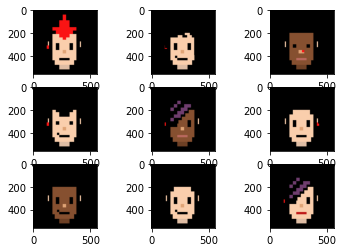

In [9]:
from matplotlib import pyplot
from matplotlib.image import imread
folder = 'images/'     #folder where your photos are store
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    x= folder + str(i) + '.png'
    # load image pixels
    image = imread(x)
    # plot raw pixel data
    pyplot.imshow(image)